<div align=center>

# Basic Example of DNN Application - Using Tensorflow

By Hamed Araab

Supervisor: Dr. Marzieh Zarinbal

</div>


### Prerequisites


In [2]:
import matplotlib.pyplot as plt
import tensorflow.keras as keras

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from keras.datasets import mnist
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Input, Dense
from keras.activations import sigmoid, relu, softmax
from keras.optimizers import SGD, Adam
from keras.losses import categorical_crossentropy
from keras.metrics import CategoricalAccuracy

### Loading the MNIST Dataset


In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### Data Preprocessing


In [4]:
X_train = X_train.reshape((60000, 784)) / 255
X_test = X_test.reshape((10000, 784)) / 255

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

### Visualizing the Dataset


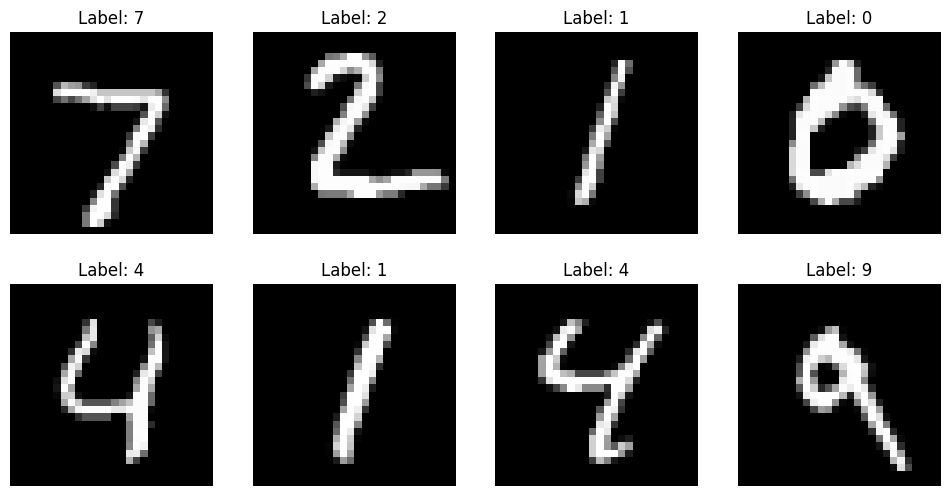

In [5]:
sample_images = X_test[:8, :]
sample_labels = Y_test[:8, :]

plt.figure(figsize=(12, 6))

for i in range(sample_images.shape[0]):
    plt.subplot(2, 4, i + 1)
    plt.imshow(sample_images[i, :].reshape((28, 28)), cmap="gray")
    plt.title(f"Label: {sample_labels[i, :].argmax()}")
    plt.axis("off")

plt.show()

### Building the CNN Model


In [6]:
model = Sequential()

model.add(Input(shape=(784,)))
model.add(Dense(units=14, activation=sigmoid))
model.add(Dense(units=12, activation=sigmoid))
model.add(Dense(units=10, activation=softmax))

model.compile(
    loss=categorical_crossentropy,
    optimizer=SGD(learning_rate=1.0),
    metrics=[CategoricalAccuracy()],
)

model.summary()

model.fit(
    X_train,
    Y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, Y_test),
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │        10,990 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,300 (44.14 KB)

 Trainable params: 11,300 (44.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 991us/step - categorical_accuracy: 0.7321 - loss: 0.8398 - val_categorical_accuracy: 0.9080 - val_loss: 0.3025
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 819us/step - categorical_accuracy: 0.9182 - loss: 0.2738 - val_categorical_accuracy: 0.9292 - val_loss: 0.2472
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 813us/step - categorical_accuracy: 0.9281 - loss: 0.2426 - val_categorical_accuracy: 0.9305 - val_loss: 0.2322
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 812us/step - categorical_accuracy: 0.9330 - loss: 0.2250 - val_categorical_accuracy: 0.9278 - val_loss: 0.2424
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 829us/step - categorical_accuracy: 0.9379 - loss: 0.2104 - val_categorical_accuracy: 0.9279 - val_loss: 0.2549
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 834us/step - categorical_accuracy: 0.9395 - loss: 0.2062 - val_categorical_accuracy: 0.9350 - val_loss: 0.2242
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 827us/step - catego

### Evaluating the Model


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step


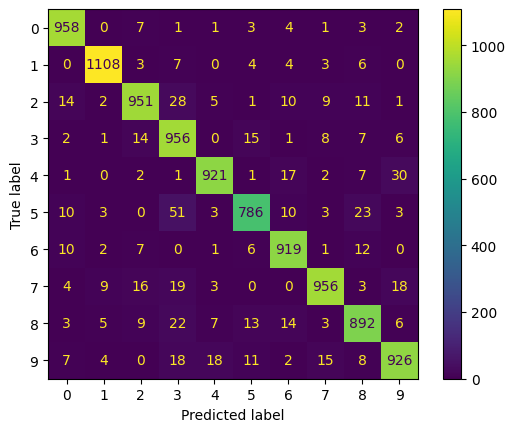

In [7]:
Y_test_hat = model.predict(X_test)

ConfusionMatrixDisplay(
    confusion_matrix(
        Y_test.argmax(axis=1, keepdims=True),
        Y_test_hat.argmax(axis=1, keepdims=True),
    ),
    display_labels=range(10),
).plot()